# Task to determine if a patient has a heart disease or not based on specified characteristics/features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df['target'].unique()

array([0, 1], dtype=int64)

### Exploratory Data Analysis:

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [9]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

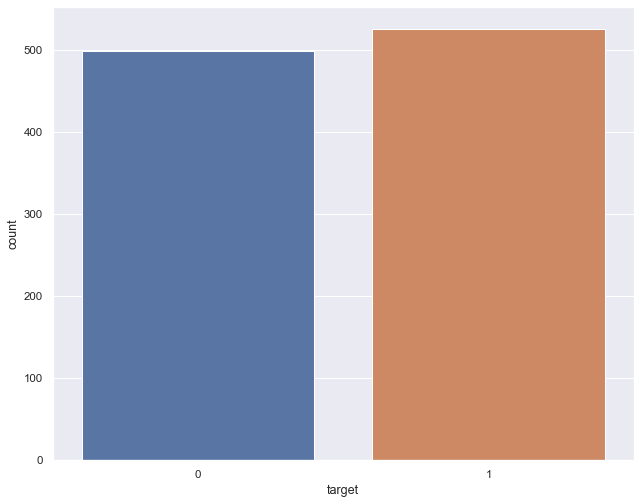

In [10]:
plt.figure(figsize=(10,8), dpi=75)
sns.countplot(data=df, x='target')

In [11]:
df1 = df[['age','trestbps', 'chol','thalach','target']]

In [12]:
df1

,age,trestbps,chol,thalach,target
0,52,125,212,168,0
1,53,140,203,155,0
2,70,145,174,125,0
3,61,148,203,161,0
4,62,138,294,106,0
...,...,...,...,...,...
1020,59,140,221,164,1
1021,60,125,258,141,0
1022,47,110,275,118,0
1023,50,110,254,159,1


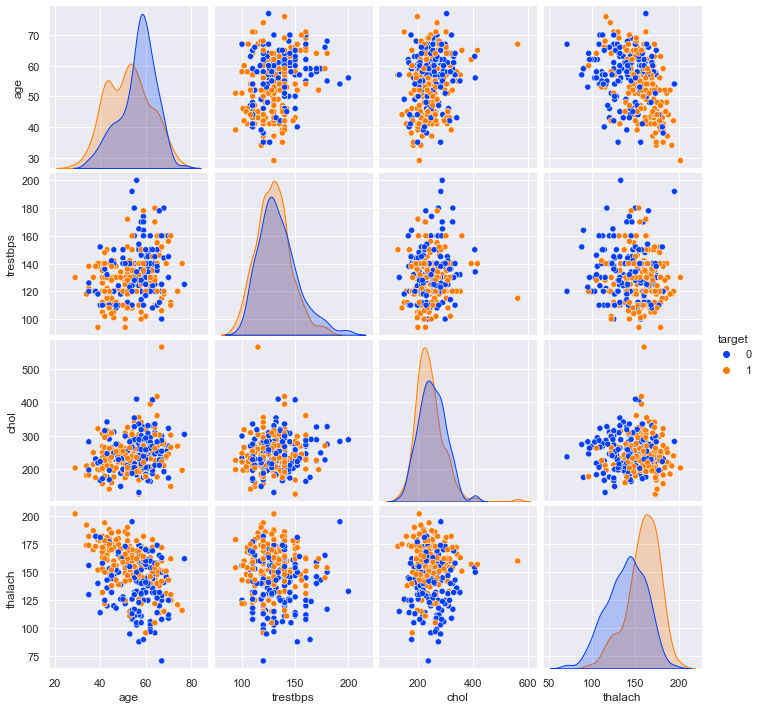

In [13]:
sns.pairplot(data=df1, hue='target', palette='bright')

<AxesSubplot:>

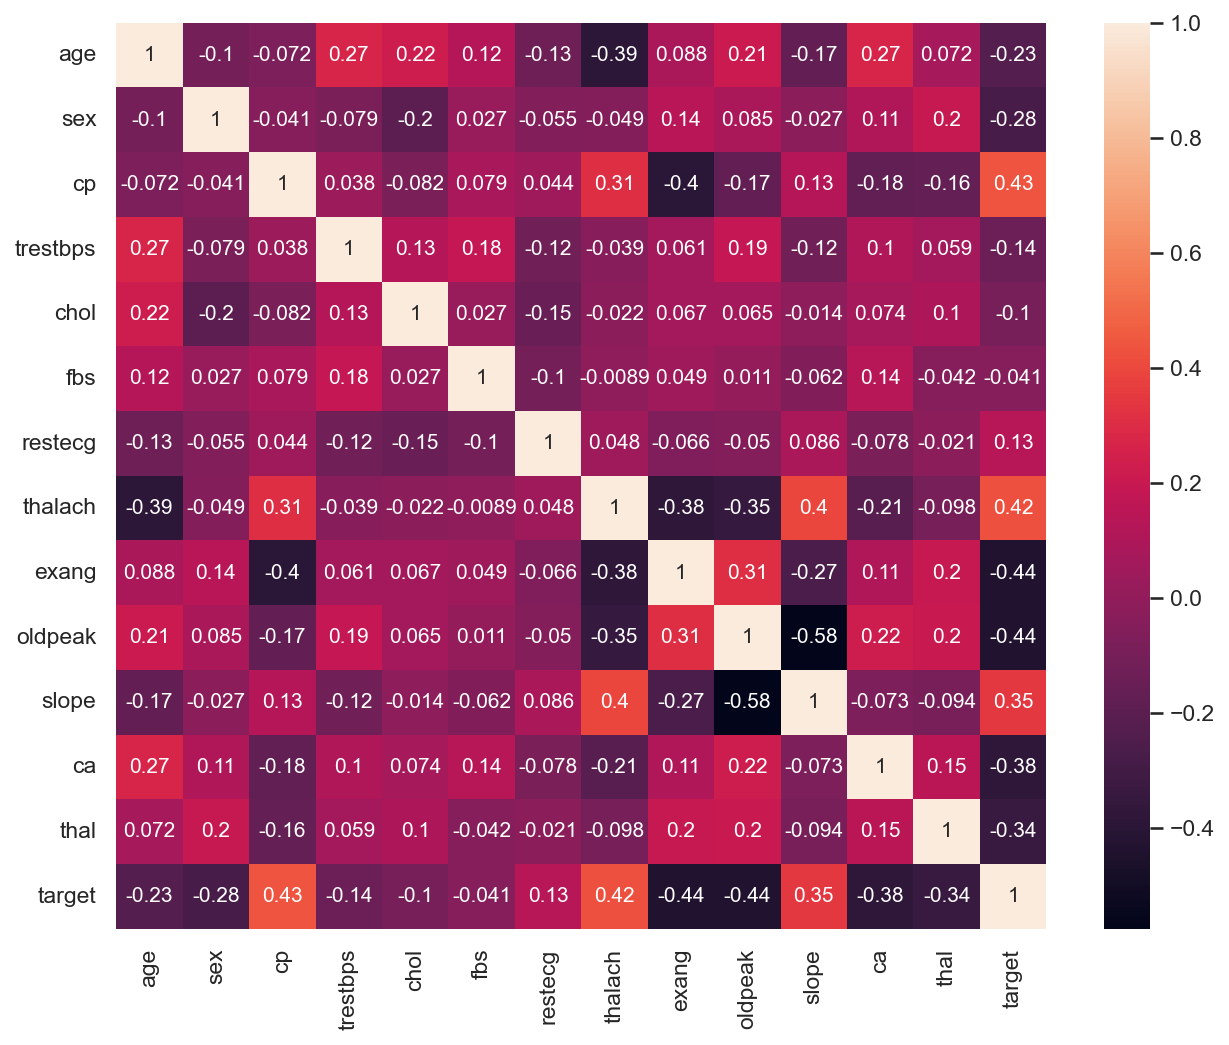

In [14]:
#We can create a heatmap that shows the correlation between each column in order to see the column that correlates best with
#our target variable.
plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(df.corr(), annot=True)

### Train | Test Splitting and standardization:

In [15]:
X = df.drop('target',axis=1)
y = df['target']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#We would create a testset containing 10% of our original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)

In [20]:
scaled_X_test = scaler.transform(X_test)

### Logistic Regression model:

In [21]:
from sklearn.linear_model import LogisticRegressionCV

In [22]:
log_model = LogisticRegressionCV()

In [23]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [24]:
#We can check our model's optimal parameters such as best C value

In [25]:
log_model.C_

array([0.00599484])

In [26]:
log_model.l1_ratio_

array([None], dtype=object)

In [27]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [28]:
#We can also check the coefficients gotten from the model:
log_model.coef_[0]

array([-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
       -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
        0.20479911, -0.32049603, -0.25727105])

In [29]:
#We can create a visualization of the coefficients using a barplot:

In [30]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [31]:
coefs = coefs.sort_values()

<AxesSubplot:>

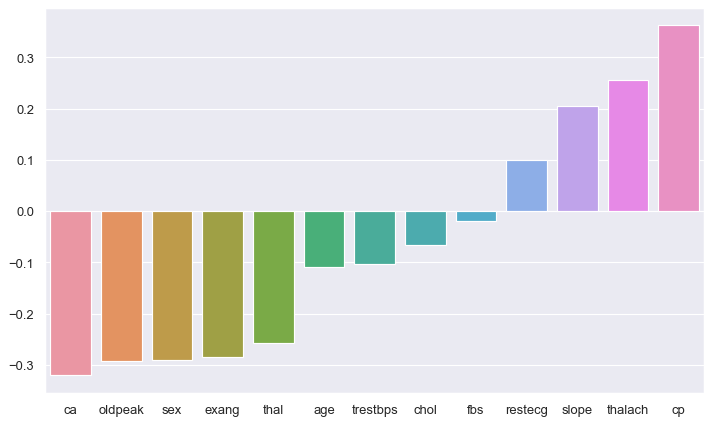

In [32]:
plt.figure(figsize=(10,6), dpi=85)
sns.barplot(x=coefs.index, y=coefs.values)

---------

## Model Performance Evaluation

In [33]:
#We would evaluate the performance of our model using accuracy, prediction, recall as well as create a confusion matrix
y_pred = log_model.predict(scaled_X_test)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
confusion_matrix(y_test, y_pred)

array([[41,  9],
       [ 5, 48]], dtype=int64)

In [38]:
accuracy_score(y_test, y_pred)

0.8640776699029126

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



### Performance Curves:

In [40]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


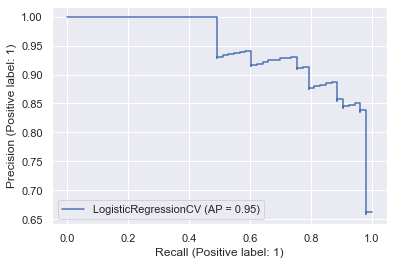

In [41]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


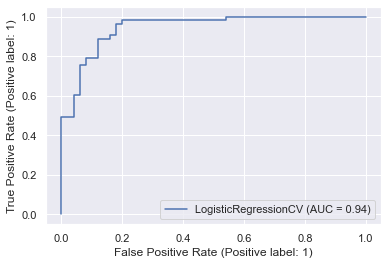

In [42]:
plot_roc_curve(log_model, scaled_X_test, y_test)

Finally, we can predict for a random patient if he/she has a heart disease or not just to test our model

In [43]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [44]:
df.iloc[9]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
target        0.0
Name: 9, dtype: float64

In [45]:
# CODE HERE
log_model.predict(patient)

array([0], dtype=int64)

In [46]:
log_model.predict_proba(patient)

array([[9.99962215e-01, 3.77854601e-05]])

We can see that we had a correct prediction for this particular patient since our prediction matched with the actual target value.